Step 1. 스티커

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

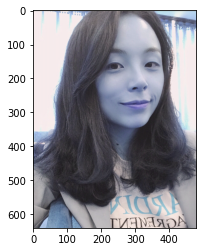

In [2]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/myimage2.png'
img_bgr = cv2.imread(my_image_path)    
img_bgr = cv2.resize(img_bgr, (480, 640))    
img_show = img_bgr.copy()      
plt.imshow(img_bgr)

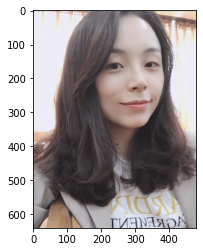

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

Step 2. 얼굴 검출 & 랜드마크 검출 하기

In [4]:
import dlib
detector_hog = dlib.get_frontal_face_detector()

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(171, 82) (438, 350)]]


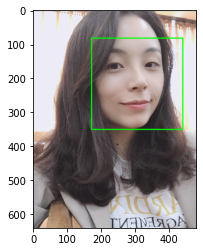

In [6]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


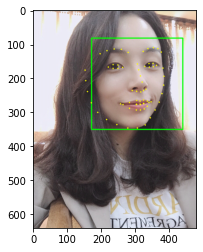

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # 2, 36, 48, 30
    x = landmark[33][0]
    y = landmark[33][1] 
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(315, 240)
(x,y) : (315,240)
(w,h) : (268,268)


(268, 268, 3)


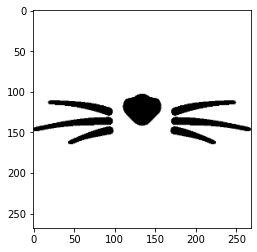

In [11]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

plt.imshow(img_sticker)

plt.show()

Step 3. 스티커 적용 위치 확인하기

In [12]:
refined_x = x - w // 2  
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (181,106)


(x,y) : (181,106)
(268, 268, 3)


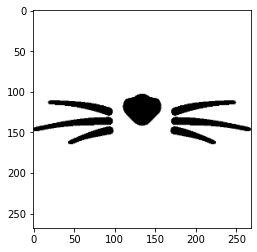

In [13]:
if refined_y < 0: 
    img_sticker = img_sticker[-refined_y:]
    print (img_sticker.shape)

    refined_y = 0
    
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
print (img_sticker.shape)

plt.imshow(img_sticker)

plt.show()

In [14]:
#refined_y = 0
#print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

# Step 4. 스티커 적용하기

In [15]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

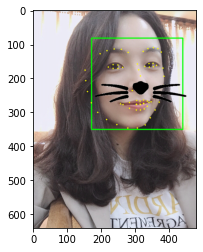

In [16]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

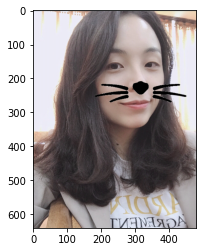

In [17]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# 처음에 만약 ==0으로 했다면, ==255로 바꿔도 전체가 투명하게 나오지 않는다!! 걍 restart를 해서 고쳐줘야 한다!!
# 이번 코딩은 전반적으로 수정이 불가해서, 수정 시 restart를 통해서 전체를 돌려주면서 수정해야 한다!!!!